In [1]:
# (c) Giles R. Greenway 11/2016
# Licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
# In which we scrape the amount raised for the Jill Stein recount using the Wayback Machine.
# Possibly interesting to investigate how the rate changed when the first recount was filed,
# when the goal increased, and after *that* "illegal votes" tweets.
# http://jillstein.nationbuilder.com/recount

from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pprint
import re
import requests

In [2]:
# https://github.com/internetarchive/wayback/tree/master/wayback-cdx-server
req = requests.get("https://web.archive.org/cdx/search/cdx?url=jillstein.nationbuilder.com/recount&output=json")
timestamps = [snapshot[1] for snapshot in req.json()[1:]]
# When did the Wayback Machine last retrieve the page?
print(datetime.strptime(timestamps[-1], '%Y%m%d%H%M%S'))

2016-11-30 08:12:12


In [3]:
def parse_val(soup,goal=False):
    # https://twitter.com/thepracticaldev/status/710156980535558144
    txt = soup.find(**{'class_':('bar-text','bar-goal')[goal]}).text
    return float(''.join(re.search('[0-9.,]+',txt).group().split(','))) / 1.0E6

def get_vals(timestamp):
    req = requests.get("http://web.archive.org/web/"+timestamp+"/https://jillstein.nationbuilder.com/recount")
    soup = BeautifulSoup(req.content, 'html.parser')
    return (parse_val(soup),parse_val(soup,goal=True))
    
data = [get_vals(t) for t in timestamps] 

In [4]:
raised, goal = zip(*data)
times = [datetime.strptime(t, '%Y%m%d%H%M%S') for t in timestamps]

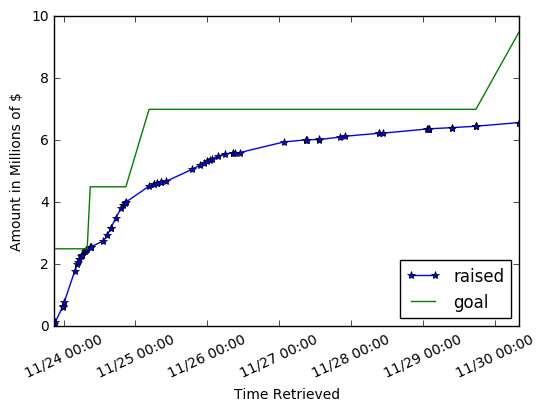

In [5]:
%matplotlib inline
fig, ax = plt.subplots()
fmt = md.DateFormatter('%m/%d %H:%M')
ax.xaxis.set_major_formatter(fmt)
plt.xticks(rotation=25)
raised_line, = plt.plot(times, raised, marker='*')
ax.set_xlabel('Time Retrieved')
ax.set_ylabel('Amount in Millions of $')
goal_line, = plt.plot(times, goal)
plt.legend([raised_line, goal_line], ['raised','goal'], loc='lower right')
plt.show()

In [6]:
isotimes = [t.isoformat() for t in times]
pprint.pprint([{k:v for k,v in zip(('time','raised','goal'),l)} for l in zip(isotimes, raised, goal)])

[{'goal': 2.5, 'raised': 0.08712213, 'time': '2016-11-23T20:51:29'},
 {'goal': 2.5, 'raised': 0.1315262, 'time': '2016-11-23T21:13:23'},
 {'goal': 2.5, 'raised': 0.62691647, 'time': '2016-11-23T23:40:49'},
 {'goal': 2.5, 'raised': 0.6463864699999999, 'time': '2016-11-23T23:45:01'},
 {'goal': 2.5, 'raised': 0.780759, 'time': '2016-11-24T00:14:41'},
 {'goal': 2.5, 'raised': 1.79218394, 'time': '2016-11-24T03:46:34'},
 {'goal': 2.5, 'raised': 1.99516603, 'time': '2016-11-24T04:31:28'},
 {'goal': 2.5, 'raised': 2.0803501399999997, 'time': '2016-11-24T04:52:55'},
 {'goal': 2.5, 'raised': 2.15936574, 'time': '2016-11-24T05:16:15'},
 {'goal': 2.5, 'raised': 2.2622157599999997, 'time': '2016-11-24T05:55:30'},
 {'goal': 2.5, 'raised': 2.28460733, 'time': '2016-11-24T06:03:43'},
 {'goal': 2.5, 'raised': 2.31521366, 'time': '2016-11-24T06:16:36'},
 {'goal': 2.5, 'raised': 2.43240102, 'time': '2016-11-24T07:05:49'},
 {'goal': 2.5, 'raised': 2.471392, 'time': '2016-11-24T07:26:41'},
 {'goal': 2.5, 